## Data visualisation
Create a graphic that shows how weather phenomena develop during the year in two US cities

### Load packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

### Load input files
Weather phenomena data was retrieved from Wikipedia:
* [Weather in Boston (Massachusetts)](https://en.wikipedia.org/wiki/Boston#Climate)
* [Weather in Chicago - Midway Airport (Illinois)](https://en.wikipedia.org/wiki/Chicago#Climate)

Average precipitation and snowfall were considered.

In [11]:
B = pd.read_csv('../data/boston.csv', skiprows = 1, encoding = 'ISO-8859-1').transpose()
B = B.rename(columns=B.iloc[0]).drop(B.index[0]).iloc[:-1,[14,16]].replace({'trace':0}).astype('float')
B.columns = ('Prec','Snow')

C = pd.read_csv('../data/chicago.csv', skiprows = 1, encoding = 'ISO-8859-1').transpose()
C = C.rename(columns=C.iloc[0]).drop(C.index[0]).iloc[:-1,[14,16]].replace({'trace':0}).astype('float')
C.columns = ('Prec','Snow')

In [12]:
B

,Prec,Snow
Jan,3.36,12.9
Feb,3.25,10.9
Mar,4.32,7.8
Apr,3.74,1.9
May,3.49,0.0
Jun,3.68,0.0
Jul,3.43,0.0
Aug,3.35,0.0
Sep,3.44,0.0
Oct,3.94,0.0


In [13]:
C

,Prec,Snow
Jan,2.06,11.5
Feb,1.94,9.1
Mar,2.72,5.4
Apr,3.64,1.0
May,4.13,0.0
Jun,4.06,0.0
Jul,4.01,0.0
Aug,3.99,0.0
Sep,3.31,0.0
Oct,3.24,0.1


### Plot 

<IPython.core.display.Javascript object>


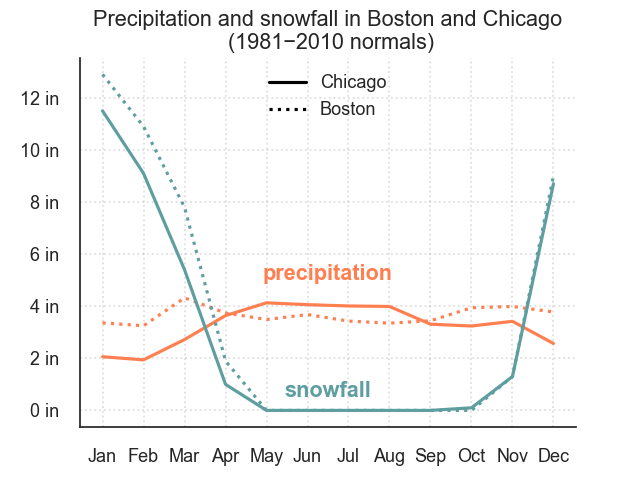

In [27]:
fig = plt.figure()

# set sns appearance
sns.set_context("talk")
sns.set_style("ticks")

# set colours
col1 = 'coral'     # precipitation
col2 = 'cadetblue' # snow

# plot precipitation 
Boston, = plt.plot(range(12), B['Prec'], label = 'Boston', c=col1, linestyle=':')
Chicago, = plt.plot(range(12), C['Prec'], label='Chicago', c=col1)

# add legend
ax = plt.gca()
plt.legend(handles=[Chicago, Boston], loc='upper center', frameon=False)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

# plot snowfall
plt.plot(range(12), B['Snow'],  c=col2, linestyle=':')
plt.plot(range(12), C['Snow'],  c=col2)

# adjust lables for x-axis
import calendar
plt.xticks(range(12), calendar.month_abbr[1:13]);

# add text
plt.text(5.5,5,'precipitation', color=col1, size='medium', ha='center', weight='bold')
plt.text(5.5,0.5,'snowfall', color=col2, size='medium', ha='center', weight='bold')

# add gridlines and despine
ax.grid(color='grey', linestyle=':', alpha=0.25)
sns.despine()
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# add title
plt.title('Precipitation and snowfall in Boston and Chicago\n (1981−2010 normals)')

# add unit to y-axis
from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d in'))